<a href="https://colab.research.google.com/github/giovanni-lucarelli/distribution-shift/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

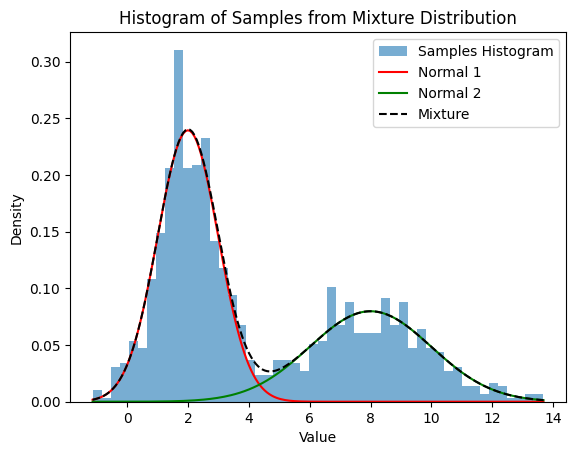

In [1]:
# prompt: create a random sample from a statistical mixture of two different normal distributions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the two normal distributions
mu1, sigma1 = 2, 1  # Mean and standard deviation for the first distribution
mu2, sigma2 = 8, 2  # Mean and standard deviation for the second distribution

# Mixing probability
pi = 0.4  # Probability of drawing from the first distribution

# Number of samples to generate
N = 1000

# Generate samples
samples = np.random.choice([0, 1], size=N, p=[1-pi, pi]) #0 for the first distribution and 1 for the second distribution
random_samples = np.zeros(N)

for i in range(N):
  if samples[i] == 0:
    random_samples[i] = np.random.normal(mu1, sigma1)
  else:
    random_samples[i] = np.random.normal(mu2, sigma2)


# Plotting the histogram of the samples
plt.hist(random_samples, bins=50, density=True, alpha=0.6, label='Samples Histogram')

# Plotting the individual normal distributions
x = np.linspace(min(random_samples), max(random_samples), 200)
plt.plot(x, (1-pi)*norm.pdf(x, mu1, sigma1), color='red', label='Normal 1')
plt.plot(x, pi*norm.pdf(x, mu2, sigma2), color='green', label='Normal 2')

# Plotting the combined mixture distribution
plt.plot(x, (1-pi)*norm.pdf(x, mu1, sigma1) + pi*norm.pdf(x, mu2, sigma2), color='black', linestyle='--', label='Mixture')

plt.title('Histogram of Samples from Mixture Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-5-53d955465605>:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, rv1.pdf(pos), colors='red', alpha = 0.4, label = 'Distribution 1', levels = 3)
<ipython-input-5-53d955465605>:46: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, rv2.pdf(pos), colors='green', alpha = 0.4, label = 'Distribution 2', levels = 3)


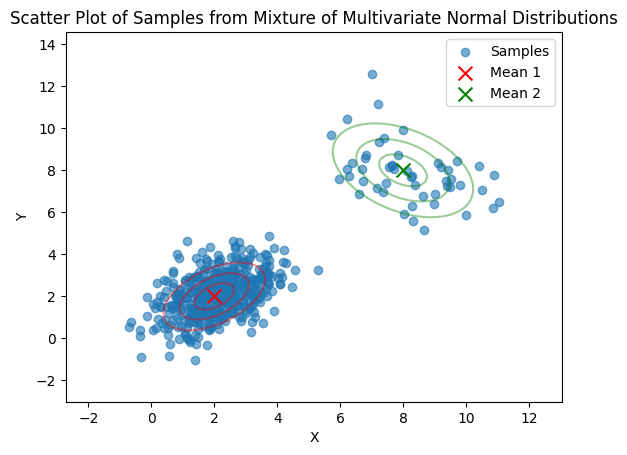

In [5]:
# prompt: create a random sample from a mixture of two multivariate normal distributions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the two multivariate normal distributions
mu1 = np.array([2, 2])    # Mean vector for the first distribution
sigma1 = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix for the first distribution
mu2 = np.array([8, 8])  # Mean vector for the second distribution
sigma2 = np.array([[2, -0.8], [-0.8, 2]])  # Covariance matrix for the second distribution

# Mixing probability
pi = 0.9 # Probability of drawing from the first distribution

# Number of samples to generate
N = 500

# Generate samples
samples = np.random.choice([0, 1], size=N, p=[pi, 1-pi]) #0 for the first distribution and 1 for the second distribution
random_samples = np.zeros((N,2))
for i in range(N):
  if samples[i] == 0:
    random_samples[i] = np.random.multivariate_normal(mu1, sigma1)
  else:
    random_samples[i] = np.random.multivariate_normal(mu2, sigma2)


# Plotting the samples
plt.scatter(random_samples[:, 0], random_samples[:, 1], alpha=0.6, label='Samples')

# Plotting the means of the distributions
plt.scatter(mu1[0], mu1[1], color='red', marker='x', s=100, label='Mean 1')
plt.scatter(mu2[0], mu2[1], color='green', marker='x', s=100, label='Mean 2')

# Plotting the contours of the distributions
x = np.linspace(min(random_samples[:,0])-2, max(random_samples[:,0])+2, 100)
y = np.linspace(min(random_samples[:,1])-2, max(random_samples[:,1])+2, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv1 = multivariate_normal(mu1, sigma1)
plt.contour(X, Y, rv1.pdf(pos), colors='red', alpha = 0.4, label = 'Distribution 1', levels = 3)

rv2 = multivariate_normal(mu2, sigma2)
plt.contour(X, Y, rv2.pdf(pos), colors='green', alpha = 0.4, label = 'Distribution 2', levels = 3)


plt.title('Scatter Plot of Samples from Mixture of Multivariate Normal Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

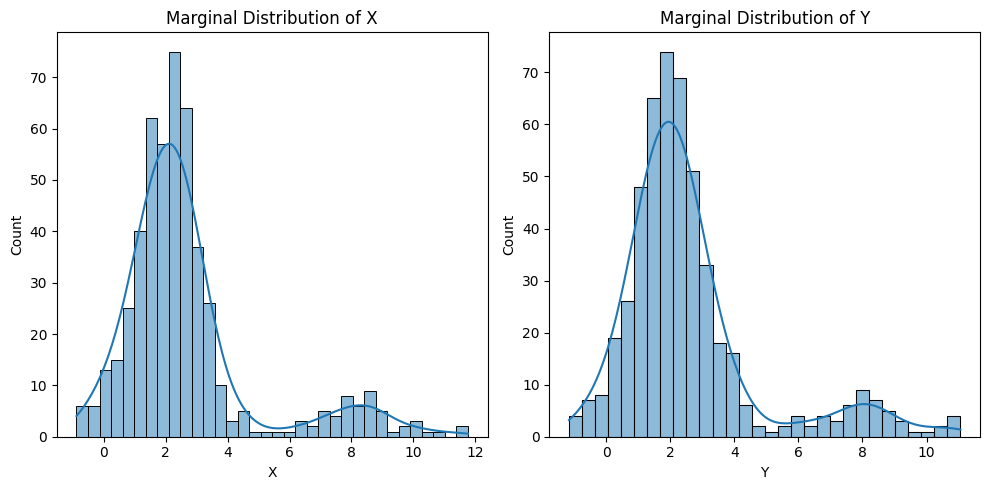

In [6]:
# prompt: plot the marginal distribution on X and Y of the previous plot

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import seaborn as sns
import pandas as pd

# Parameters for the two multivariate normal distributions
mu1 = np.array([2, 2])    # Mean vector for the first distribution
sigma1 = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix for the first distribution
mu2 = np.array([8, 8])  # Mean vector for the second distribution
sigma2 = np.array([[2, -0.8], [-0.8, 2]])  # Covariance matrix for the second distribution

# Mixing probability
pi = 0.9 # Probability of drawing from the first distribution

# Number of samples to generate
N = 500

# Generate samples
samples = np.random.choice([0, 1], size=N, p=[pi, 1-pi]) #0 for the first distribution and 1 for the second distribution
random_samples = np.zeros((N,2))
for i in range(N):
  if samples[i] == 0:
    random_samples[i] = np.random.multivariate_normal(mu1, sigma1)
  else:
    random_samples[i] = np.random.multivariate_normal(mu2, sigma2)


# Plotting the marginal distributions
df = pd.DataFrame(random_samples, columns=['X', 'Y'])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['X'], kde=True)
plt.title('Marginal Distribution of X')

plt.subplot(1, 2, 2)
sns.histplot(df['Y'], kde=True)
plt.title('Marginal Distribution of Y')

plt.tight_layout()
plt.show()

In [3]:
# prompt: count the frequency od 0 and 1 in the vector samples

import numpy as np
zeros_count = np.count_nonzero(samples == 0)
ones_count = np.count_nonzero(samples == 1)

print(f"Frequency of 0: {zeros_count}")
print(f"Frequency of 1: {ones_count}")


Frequency of 0: 343
Frequency of 1: 157
